<a href="https://colab.research.google.com/github/Joy-Onuoha21/Machine-Learning-Project/blob/main_Update/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           5         1         1         1         2         1         3   
1           5         4         4         5         7        10         3   
2           3         1         1         1         2         2         3   
3           6         8         8         1         3         4         3   
4           4         1         1         3         2         1         3   
..        ...       ...       ...       ...       ...       ...       ...   
695         2         1         1         1         2         1         1   
696         5        10        10         3         7         3         8   
697         4         8         6         4         3         4        10   
698         4         8         8         5         4         5        10   
699         3         1         1         1         2         1         3   

     feature8  featue9  class  
0           1        1      0  
1          

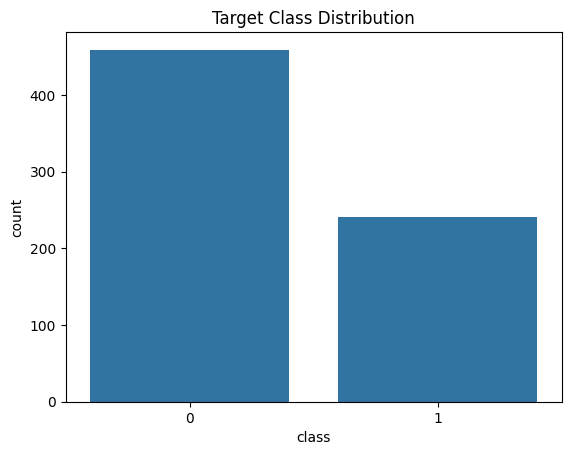

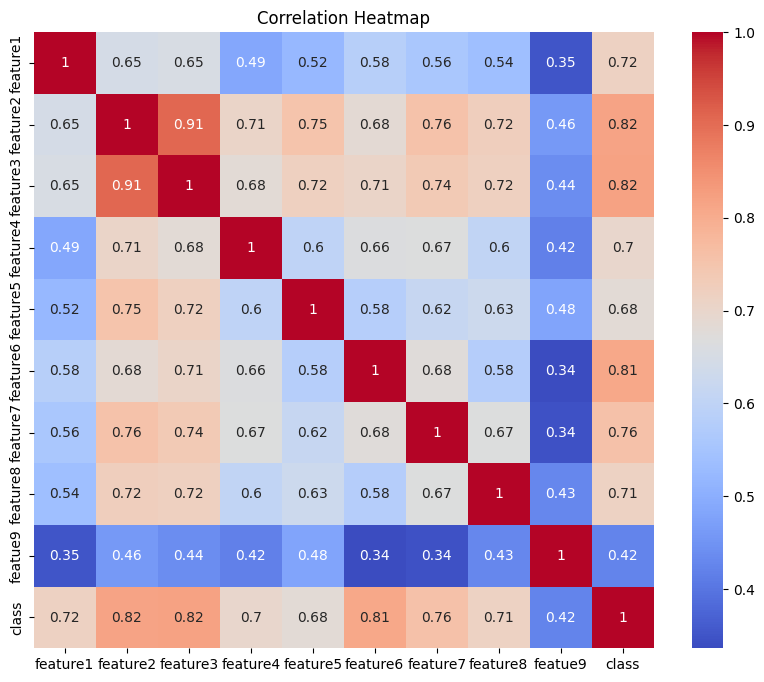

class: 0
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8     featue9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.000000    1.000000    1.000000    0.0  
25%   

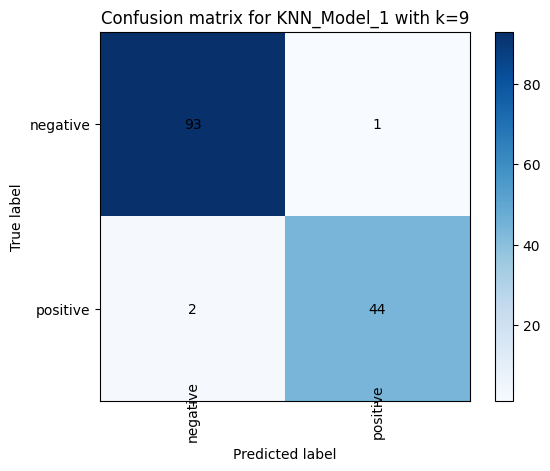

KNN_Model_1 with hyperparameter 9
Accuracy: 0.9785714285714285
Precision: 0.9777777777777777
Recall: 0.9565217391304348
F1-Score: 0.967032967032967



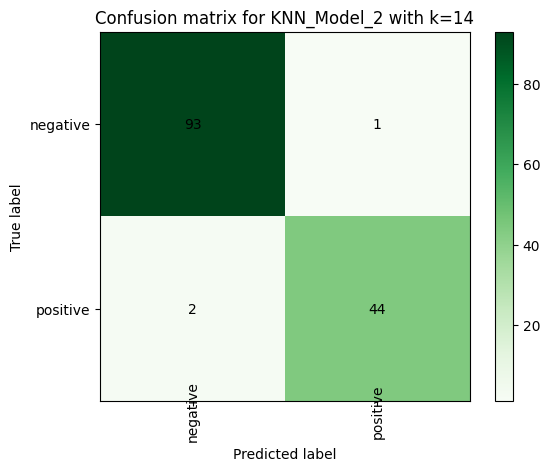

KNN_Model_2 with hyperparameter 14
Accuracy: 0.9785714285714285
Precision: 0.9777777777777777
Recall: 0.9565217391304348
F1-Score: 0.967032967032967



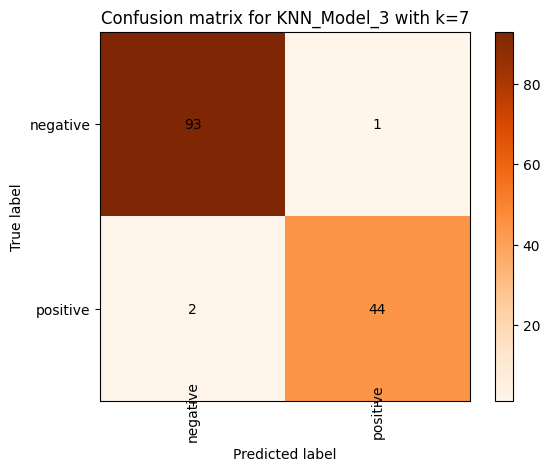

KNN_Model_3 with hyperparameter 7
Accuracy: 0.9785714285714285
Precision: 0.9777777777777777
Recall: 0.9565217391304348
F1-Score: 0.967032967032967

Best L values for Logistic Regression
Best l value for accuracy: 10
Best l value for precision: 10
Best l value for recall: 0.001
Best l value for F1-Score: 10



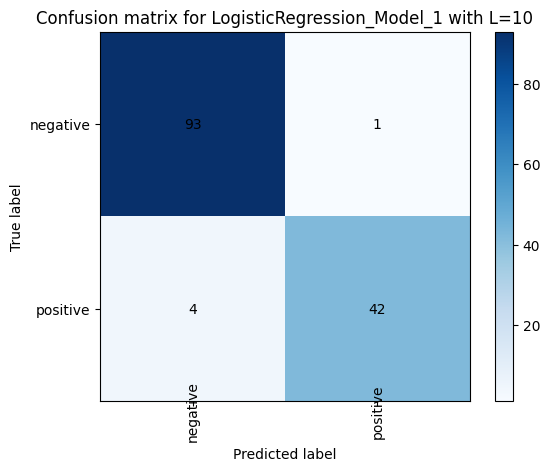

LogisticRegression_Model_1 with hyperparameter 10
Accuracy: 0.9642857142857143
Precision: 0.9767441860465116
Recall: 0.9130434782608695
F1-Score: 0.9438202247191011



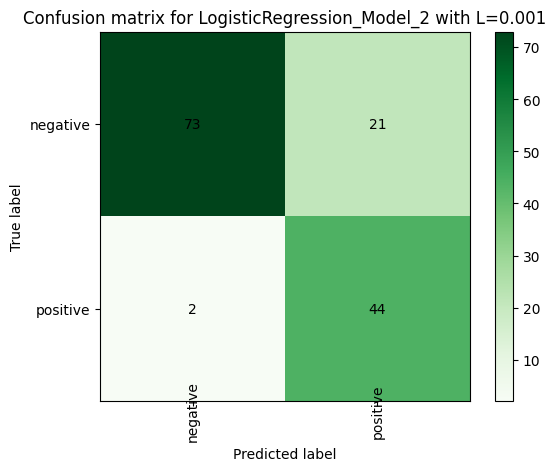

LogisticRegression_Model_2 with hyperparameter 0.001
Accuracy: 0.8357142857142857
Precision: 0.676923076923077
Recall: 0.9565217391304348
F1-Score: 0.7927927927927928

Evaluation Metric for Gausian Naives Bayes
Accuracy: 0.9642857142857143
Precision: 0.9183673469387755
Recall: 0.9782608695652174
F1-Score: 0.9473684210526315


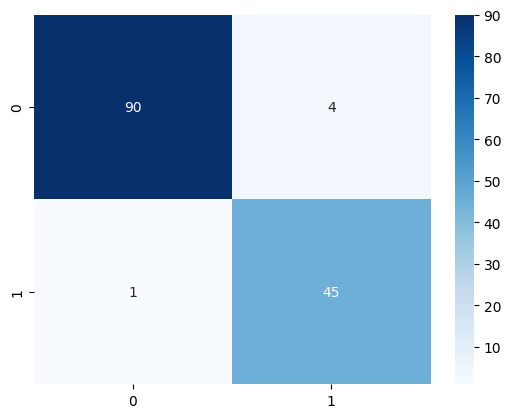

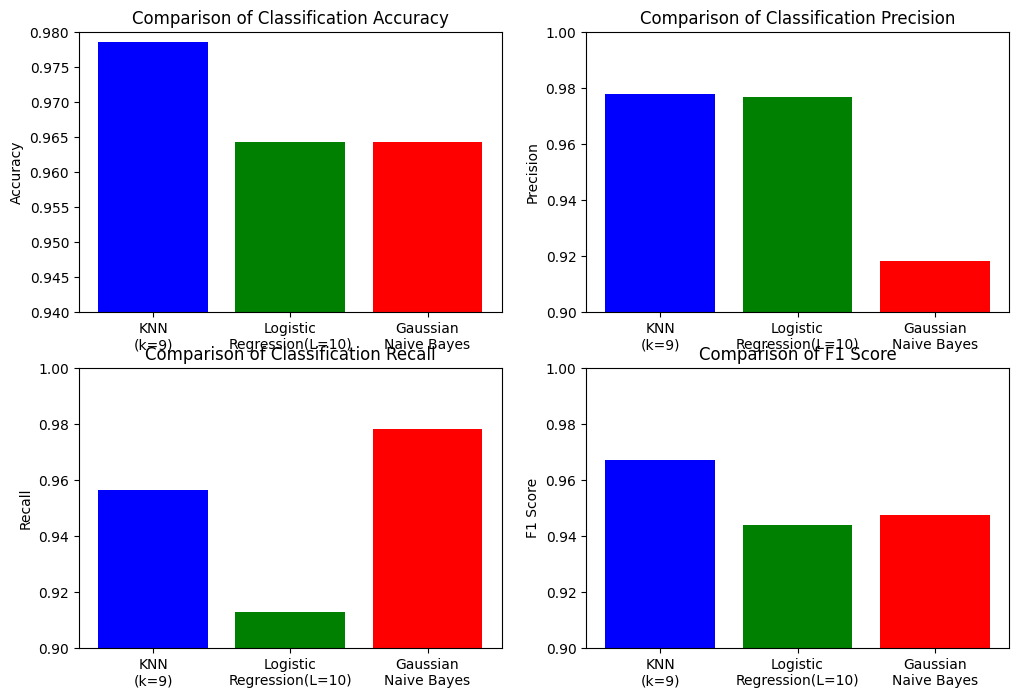

Camparison Visualization of best models from each classifier


In [2]:


#imported packages/libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Load the dataset and print the data information
dataset = pd.read_csv("dataset_assignment1.csv")
print(f'{dataset}\n')


#Print out the number of samples for each class in the dataset
class1 = dataset[dataset.iloc[:, -1]==1]
print(f'Number of sample for class 1: {class1.shape}\n')

class0 = dataset[dataset.iloc[:, -1]==0]
print(f'Number of sample for class 0: {class0.shape}\n')

#label
label = dataset.iloc[:, -1]

# Features
features = dataset.iloc[:, :-1]

# Visualize Data
sns.countplot(x=label)
plt.title('Target Class Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# For each class, print-out the statistical description of features
grouped = dataset.groupby('class')
for name, group in grouped:
    print('class: {}'.format(name))
    print(f'{group.describe()}\n')

# Split data into a training dataset and a testing dataset
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=42)
#label_test


# KNN Model
# define the range of parameter values
k_values = range(1, 21)

# empty lists to store the mean of each metric
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# iterate over each k value
for k in k_values:
    # initialize  kNN model
    knnClassifier = KNeighborsClassifier(n_neighbors=k)

    # calculate cross-validation scores for each metric
    accuracy_cv = cross_val_score(knnClassifier, features_train, label_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(knnClassifier, features_train, label_train, cv=5, scoring='precision')
    recall_cv = cross_val_score(knnClassifier, features_train, label_train, cv=5, scoring='recall')
    f1_cv = cross_val_score(knnClassifier, features_train, label_train, cv=5, scoring='f1')

    # append the mean of each metric to their list
    accuracy_scores.append(accuracy_cv.mean())
    precision_scores.append(precision_cv.mean())
    recall_scores.append(recall_cv.mean())
    f1_scores.append(f1_cv.mean())
# find the index of the best k value based on each metric
best_accuracy_k = accuracy_scores.index(max(accuracy_scores)) + 1
best_precision_k = precision_scores.index(max(precision_scores)) + 1
best_recall_k = recall_scores.index(max(recall_scores)) + 1
best_f1_k = f1_scores.index(max(f1_scores)) + 1

# print the best k value based on each metric
print(f"Best k value for accuracy: {best_accuracy_k}")
print(f"Best k value for precision: {best_precision_k}")
print(f"Best k value for recall: {best_recall_k}")
print(f"Best k value for F1-Score: {best_f1_k}\n")

# the best hyperparameters
best_hyperparameters = {"KNN_Model_1":9, "KNN_Model_2":14, "KNN_Model_3":7}

# train KNN model using the best hyperparameters
def KNNModelPredict(features_train,features_test, label_test, label_train, n_neighbors):
  for item in n_neighbors:
    knnClassifier = KNeighborsClassifier(n_neighbors[item])
    knnClassifier.fit(features_train, label_train)

    # predict target values for test data
    y_pred = knnClassifier.predict(features_test)

    # evaluate  model performance with different evaluation metrics
    accuracyKnn = accuracy_score(label_test, y_pred)
    precisionKnn = precision_score(label_test, y_pred)
    recallKnn = recall_score(label_test, y_pred)
    f1_scoreKnn = f1_score(label_test, y_pred)

    # List of colours
    colours = ["Blues", "Greens", "Oranges", "Purples", "Reds"]

    # A dictionary to map KNN models to colors
    cmap_dict = dict(zip(n_neighbors.keys(), colours))

    # calculate  confusion matrix
    cm = confusion_matrix(label_test, y_pred)

    # plot confusion matrix as heatmap using the corresponding color map
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=cmap_dict[item])

    # show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(["negative", "positive"])))
    ax.set_yticks(np.arange(len(["negative", "positive"])))
    ax.set_xticklabels(["negative", "positive"])
    ax.set_yticklabels(["negative", "positive"])

    # rotate the x-axis labels to be vertical
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center", va="center",
              rotation_mode="anchor")

    # add text labels to the confusion matrix plot
    for i in range(len(["negative", "positive"])):
        for j in range(len(["negative", "positive"])):
            text = ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

    # add a colorbar
    ax.figure.colorbar(im, ax=ax)

    # set title, axis labels and display the plot
    ax.set_title(f"Confusion matrix for {item} with k={n_neighbors[item]}")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.show()

    print(f'{item} with hyperparameter {n_neighbors[item]}')
    print("Accuracy:", accuracyKnn)
    print("Precision:", precisionKnn)
    print("Recall:", recallKnn)
    print(f"F1-Score: {f1_scoreKnn}\n")
  return

KNNModelPredict(features_train,features_test, label_test, label_train, best_hyperparameters)


# Logistic Regression
from sklearn.linear_model import LogisticRegression

# parameter values for regularisation
L_values = [0.001, 0.01, 0.1, 1, 10, 100]

# empty lists to store  mean values
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# iterate over each l value
for L in L_values:
    # initializing logistic regression model
    logreg = LogisticRegression(C=L, solver='liblinear')

    # calculate cross-validation scores for each metric
    accuracy_cv = cross_val_score(logreg, features_train, label_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(logreg, features_train, label_train, cv=5, scoring='precision')
    recall_cv = cross_val_score(logreg, features_train, label_train, cv=5, scoring='recall')
    f1_cv = cross_val_score(logreg, features_train, label_train, cv=5, scoring='f1')

    # appending mean of the metrics to list
    accuracy_scores.append(accuracy_cv.mean())
    precision_scores.append(precision_cv.mean())
    recall_scores.append(recall_cv.mean())
    f1_scores.append(f1_cv.mean())

# finding index of the best l value based on each metric
best_accuracy_l = L_values[accuracy_scores.index(max(accuracy_scores))]
best_precision_l = L_values[precision_scores.index(max(precision_scores))]
best_recall_l = L_values[recall_scores.index(max(recall_scores))]
best_f1_l = L_values[f1_scores.index(max(f1_scores))]

# print best l value based on each metric
print('Best L values for Logistic Regression')
print(f"Best l value for accuracy: {best_accuracy_l}")
print(f"Best l value for precision: {best_precision_l}")
print(f"Best l value for recall: {best_recall_l}")
print(f"Best l value for F1-Score: {best_f1_l}\n")


# the best hyperparameters
best_hyperparametersLog = {"LogisticRegression_Model_1":10, "LogisticRegression_Model_2":0.001}

# train model using the best hyperparameters
def LogModelPredict(features_train,features_test, label_test, label_train, best_hyperparametersLog):
  for item in best_hyperparametersLog:
    logreg_best = LogisticRegression(C=best_hyperparametersLog[item], solver='liblinear')
    logreg_best.fit(features_train, label_train)

    # predict target values for the test set
    y_pred = logreg_best.predict(features_test)

    # evaluating model performance using different evaluation metrics
    accuracylog = accuracy_score(label_test, y_pred)
    precisionlog = precision_score(label_test, y_pred)
    recalllog = recall_score(label_test, y_pred)
    f1_scorelog = f1_score(label_test, y_pred)

    # List of colours
    colours = ["Blues", "Greens", "Oranges", "Purples", "Reds"]

    # A dictionary to map KNN models to colors
    cmap_dict = dict(zip(best_hyperparametersLog.keys(), colours))

    # calculate  confusion matrix
    cm = confusion_matrix(label_test, y_pred)

    # plot confusion matrix as heatmap using the corresponding color map
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=cmap_dict[item])

    # show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(["negative", "positive"])))
    ax.set_yticks(np.arange(len(["negative", "positive"])))
    ax.set_xticklabels(["negative", "positive"])
    ax.set_yticklabels(["negative", "positive"])

    # rotate the x-axis labels to be vertical
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center", va="center",
              rotation_mode="anchor")

    # add text labels to the confusion matrix plot
    for i in range(len(["negative", "positive"])):
        for j in range(len(["negative", "positive"])):
            text = ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

    # add a colorbar
    ax.figure.colorbar(im, ax=ax)

    # set title, axis labels and display the plot
    ax.set_title(f"Confusion matrix for {item} with L={best_hyperparametersLog[item]}")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.show()

    print(f'{item} with hyperparameter {best_hyperparametersLog[item]}')
    print("Accuracy:", accuracylog)
    print("Precision:", precisionlog)
    print("Recall:", recalllog)
    print(f"F1-Score: {f1_scorelog}\n")
  return

LogModelPredict(features_train,features_test, label_test, label_train, best_hyperparametersLog)

# Gausian Naives Bayes

# Initialize Gausian Naives Bayes Model
naivesBayes = GaussianNB()

# Fit model to training data
naivesBayes.fit(features_train, label_train)

# Predict target label for test data
y_pred = naivesBayes.predict(features_test)

# evaluating model performance using different evaluation metrics
accuracy_naivesBayes = accuracy_score(label_test, y_pred)
precision_naivesBayes = precision_score(label_test, y_pred)
recall_naivesBayes = recall_score(label_test, y_pred)
f1_score_naivesBayes =f1_score(label_test, y_pred)

# Print evaluation metric
print('Evaluation Metric for Gausian Naives Bayes')
print("Accuracy:", accuracy_naivesBayes)
print("Precision:", precision_naivesBayes)
print("Recall:", recall_naivesBayes)
print("F1-Score:", f1_score_naivesBayes)

# calculate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues")


# Camparison Visualization of best models from each classifier

accuracy = [0.9786, 0.9643, 0.9643]
precision = [0.9778, 0.9767, 0.9184]
recall = [0.9565, 0.9130, 0.9783]
f1_score = [0.9670, 0.9438, 0.9474]
models = ['KNN\n(k=9)', 'Logistic\nRegression(L=10)', 'Gaussian\nNaive Bayes']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Bar chart for accuracy
axs[0, 0].bar(models, accuracy, color=['b', 'g', 'r'])
axs[0, 0].set_ylim([0.94, 0.98])
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Comparison of Classification Accuracy')

# Bar chart for precision
axs[0, 1].bar(models, precision, color=['b', 'g', 'r'])
axs[0, 1].set_ylim([0.90, 1.0])
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Comparison of Classification Precision')

# Bar chart for recall
axs[1, 0].bar(models, recall, color=['b', 'g', 'r'])
axs[1, 0].set_ylim([0.90, 1.0])
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Comparison of Classification Recall')

# Bar chart for F1 score
axs[1, 1].bar(models, f1_score, color=['b', 'g', 'r'])
axs[1, 1].set_ylim([0.90, 1.0])
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_title('Comparison of F1 Score')

plt.show()
print("Camparison Visualization of best models from each classifier")